In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [2]:
df = pd.read_csv('../input/student-scores/student_scores.csv')
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# 20 data pertama jadi train, sisanya jadi test
x_train = df['Hours'].values[:20]
y_train = df['Scores'].values[:20]

x_test = df['Hours'].values[20:]
y_test = df['Scores'].values[20:]

# Sebaran datapoints

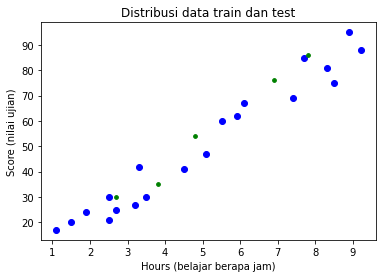

In [4]:
plt.title('Distribusi data train dan test')
plt.scatter(x_train, y_train, c='b', s=36)
plt.scatter(x_test, y_test, c='g', s=14)
plt.xlabel('Hours (belajar berapa jam)')
plt.ylabel('Score (nilai ujian)')
plt.show()

# Statistical approach

### Fungsi untuk ngitung value b0 dan b1

In [5]:
def calculate_variables(x, y):
    # x_bar dan y_bar
    x_mean, y_mean = np.mean(x), np.mean(y)
    
    b1_numerator = sum([(x_i-x_mean)*(y_i-y_mean) for x_i, y_i in zip(x,y)])
    b1_denominator = sum([(x_i-x_mean)**2 for x_i in x])
    
    # b1 ini ntar jadi gradien
    b1 = b1_numerator/b1_denominator
    
    b0 = y_mean - b1 * x_mean
    
    return np.array([b0, b1])

In [6]:
b0, b1 = calculate_variables(x_train, y_train)
print('b0 :', b0)
print('b1 :', b1)

b0 : 3.031283038605764
b1 : 9.520386094943449


### Garis linear regression yang dibuat berdasarkan data train (yang biru)

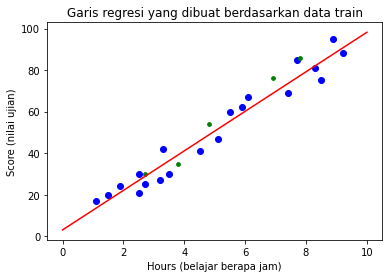

In [7]:
plt.scatter(x_train, y_train, c='b', s=36)
plt.scatter(x_test, y_test, c='g', s=14)

x_line = np.linspace(0, 10, 100)
y_line = b0 + b1*x_line
plt.plot(x_line, y_line, c='r')

plt.title('Garis regresi yang dibuat berdasarkan data train')
plt.xlabel('Hours (belajar berapa jam)')
plt.ylabel('Score (nilai ujian)')
plt.show()

### Fungsi untuk memprediksi titik data test berdasarkan garis linear regression

In [8]:
# variables adalah array yang isinya [b0, b1]
def predict(data, variables):
    predictions = [variables[0] + variables[1]*x_i for x_i in data]
    return predictions

In [9]:
test_preds = predict(x_test, [b0, b1])
test_preds = np.round(test_preds, 1)

print('Jam belajar\t:', x_test)
print('Prediksi nilai\t:', test_preds)

Jam belajar	: [2.7 4.8 3.8 6.9 7.8]
Prediksi nilai	: [28.7 48.7 39.2 68.7 77.3]


### Fungsi untuk menghitung MSE

In [12]:
def mse(actual, predicted):
    error = sum([(act_i-pred_i)**2 for act_i, pred_i in zip(actual,predicted)])/len(actual)
    return error

### Memprediksi data train biar tau error terhadap data trainnya

In [13]:
train_preds = predict(x_train, [b0, b1])
train_preds = np.round(train_preds, 1)
train_preds

array([26.8, 51.6, 33.5, 84. , 36.4, 17.3, 90.6, 55.4, 82.1, 28.7, 76.3,
       59.2, 45.9, 34.4, 13.5, 87.8, 26.8, 21.1, 61.1, 73.5])

In [14]:
print('Train error\t: ', mse(y_train, train_preds))
print('Test error\t: ', mse(y_test, test_preds))

Train error	:  28.610999999999997
Test error	:  35.28


# Machine learning approach

In [16]:
np.random.seed(33)
b0 = np.random.uniform(low=-10, high=10)
b1 = np.random.uniform(low=-10, high=10)
print('b0 :', b0)
print('b1 :', b1)

b0 : -5.029797451245401
b1 : -1.0004915789840911


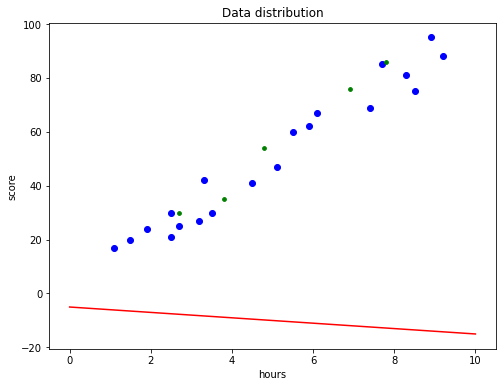

In [17]:
x_line = np.linspace(0,10,100)
y_line = b0 + b1*x_line

plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x_train, y_train, c='b', s=36)
plt.scatter(x_test, y_test, c='g', s=14)
plt.plot(x_line,y_line, c='r')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [18]:
L = 0.001
epochs = 100

In [19]:
# Jumlah sampel di dataset
n = np.float(x_train.shape[0])

# Buat list kosong untuk menyimpan loss value
# pada tiap epochnya
losses = []
for i in range(epochs):
    yhat_train = b0 + b1*x_train
    
    # Masukin loss value ke list
    error = mse(y_train, yhat_train)
    losses.append(error)
    
    # Turunan
    d_b0 = (-2/n) * np.sum(y_train - yhat_train)
    d_b1 = (-2/n) * np.sum(x_train * (y_train - yhat_train))
    
    # Update value
    b0 = b0 - L*d_b0
    b1 = b1 - L*d_b1

In [20]:
print('New b0:', b0)
print('New b1:', b1)

New b0: -2.943493207815612
New b1: 10.456522322385808


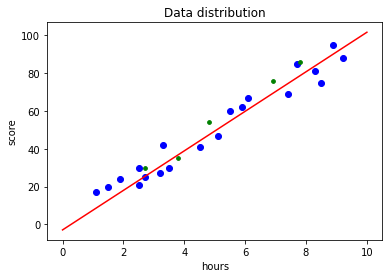

In [21]:
x_line = np.linspace(0,10,100)
y_line = b0 + b1*x_line

plt.title('Data distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(x_train, y_train, c='b', s=36)
plt.scatter(x_test, y_test, c='g', s=14)
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

Initial train loss	: 4410.196909727855
Final train loss	: 36.151252267746926


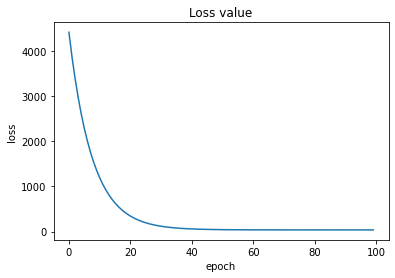

In [22]:
plt.title('Loss value')
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
print('Initial train loss\t:', losses[0])
print('Final train loss\t:', losses[-1])

In [23]:
test_preds = predict(x_test, [b0, b1])
test_preds = np.round(test_preds, 1)
print('Test error\t: ', mse(y_test, test_preds))

Test error	:  34.513999999999996
